
# ASSIGNED exam2-1



**This is an exam problem. It is open note, and you may consult the internet. By turning in this problem, you agree that the work is your own, and you did not work with anyone to complete it. Anything else is considered cheating. If you see students working together on this problem, it is cheating and you should report it.**

In spectroscopy, peaks are often modeled by a Lorentzian function:

$L(x) = \frac{A}{\pi}\frac{0.5 \Gamma}{(x - x_0)^2 + (0.5\Gamma)^2}$

Where $A$ is related to the intensity, &Gamma; is a parameter specifying the width, and $x_0$ is the position of the peak.

In the following spectrum, there appear to be two peaks.



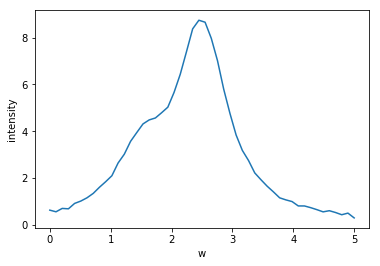

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

w = np.array([ 0.   ,  0.102,  0.204,  0.306,  0.408,  0.51 ,  0.612,  0.714,
               0.816,  0.918,  1.02 ,  1.122,  1.224,  1.327,  1.429,  1.531,
               1.633,  1.735,  1.837,  1.939,  2.041,  2.143,  2.245,  2.347,
               2.449,  2.551,  2.653,  2.755,  2.857,  2.959,  3.061,  3.163,
               3.265,  3.367,  3.469,  3.571,  3.673,  3.776,  3.878,  3.98 ,
               4.082,  4.184,  4.286,  4.388,  4.49 ,  4.592,  4.694,  4.796,
               4.898,  5.   ])

intensity = np.array([ 0.629,  0.559,  0.703,  0.686,  0.917,  1.018,  1.158,  1.346,
                       1.608,  1.845,  2.1  ,  2.644,  3.02 ,  3.57 ,  3.946,  4.314,
                       4.486,  4.569,  4.793,  5.03 ,  5.659,  6.436,  7.397,  8.378,
                       8.746,  8.662,  7.973,  7.018,  5.799,  4.77 ,  3.84 ,  3.184,
                       2.749,  2.221,  1.929,  1.652,  1.412,  1.156,  1.068,  0.996,
                       0.809,  0.808,  0.735,  0.65 ,  0.556,  0.605,  0.528,  0.433,
                       0.502,  0.297])
plt.plot(w, intensity)
plt.xlabel('w')
plt.ylabel('intensity')

Use this information to find the parameters for the two peaks. You can assume that the intensity can be modeled as $i = L(w; p1) + L(w; p2)$ where $p1, p2$ are the parameters for each Lorentzian peak.



The two peaks are caused by there being two species present. The relative amounts of each species can be computed two different ways. The first way is the ratio of the $A$ parameters, which is essentially related to the heights of the peaks. Compute the ratio of the $A$ parameters to estimate the relative amounts of each species.



The second way is to compute the ratio of the areas under each fitted peak. Compute this ratio, and compare it to the height ratio. Explain why the are similar in this case.




## solution



We create a model function for the Lorentzian function that takes three parameters. Then, we create an objective function with 6 parameters (3 for each peak) that returns the summed squared error between the model and data.



In [1]:
def model(pars, x):
    A, gamma, x0 = pars
    return A / np.pi * 0.5 * gamma / ((x - x0)**2 + (0.5 * gamma)**2)

def objective(pars):
    p1 = pars[0:3]
    p2 = pars[3:]
    I = model(p1, w) + model(p2, w)
    errs = I - intensity
    return np.sum(errs**2)

Then, we use minimize to find the parameters. You can make initial guesses from inspection of the data, e.g. the location, heights and widths of the peaks.



(array([ 3.93524231,  0.98456647,  1.49690393]),
 array([ 13.10333468,   1.00136008,   2.49889485]))

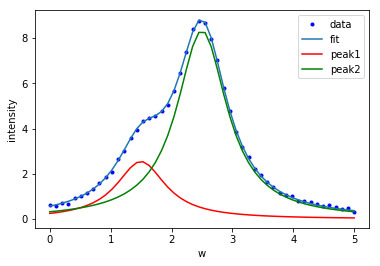

In [1]:
from scipy.optimize import minimize

sol = minimize(objective, [4, 2, 1.5, 10, 2.5, 2.5])
p1 = sol.x[0:3]
p2 = sol.x[3:]

fI = model(p1, w) + model(p2, w)
plt.plot(w, intensity, 'b.', w, fI)
plt.plot(w, model(p1, w), 'r-')
plt.plot(w, model(p2, w), 'g-')
plt.xlabel('w')
plt.ylabel('intensity')
plt.legend(['data', 'fit', 'peak1', 'peak2'])
p1, p2

Note that you should always plot the fit, to make sure it looks good. It is also a good idea to plot the two peaks to make sure they also make sense (e.g. they are located in the right place).



In [1]:
height_ratio = p1[0] / p2[0]
print(f'The height ratio (A1 / A2) is {height_ratio:1.2f}.')

The height ratio (A1 / A2) is 0.30.

To compute the area ratio, we need the area under each peak.



In [1]:
from scipy.integrate import quad

def i1(x):
    return model(p1, x)
a1, _ = quad(i1, 0, 5)

def i2(x):
    return model(p2, x)
a2, _ = quad(i2, 0, 5)

print(f'The area ratio (area1 / area2) is {a1 / a2:1.2f}.')

The area ratio (area1 / area2) is 0.29.

The reason these ratios are so similar is that the peaks are symmetric, and have similar widths. If they were not this way, the ratios would not be similar.

